<a href="https://colab.research.google.com/github/YazCodes/Deep-Learning-projects/blob/main/DataAugmentationDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Augmentation with DNN Exercise

##Get standard MNIST dataset

Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.

In [ ]:
# load the mnist dataset from keras
import keras
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

#normalisation 
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0 #the biggest pixel value in the grayscale image 
x_test = x_test.astype('float32') / 255.0

# One hot encode the output data
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 0s 0us/step


## Create, compile and fit model with original MNIST data only

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.9234 - accuracy: 0.7142 - val_loss: 0.3051 - val_accuracy: 0.9106
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3056 - accuracy: 0.9135 - val_loss: 0.2578 - val_accuracy: 0.9246
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2642 - accuracy: 0.9247 - val_loss: 0.2449 - val_accuracy: 0.9278
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2402 - accuracy: 0.9321 - val_loss: 0.2352 - val_accuracy: 0.9320
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2266 - accuracy: 0.9349 - val_loss: 0.2277 - val_accuracy: 0.9306
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2223 - accuracy: 0.9360 - val_loss: 0.2236 - val_accuracy: 0.9324
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2108 - accuracy: 0.9391 - val_loss: 0.2161 - val_accuracy:

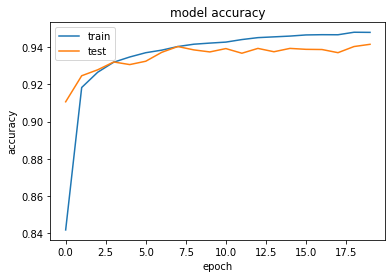

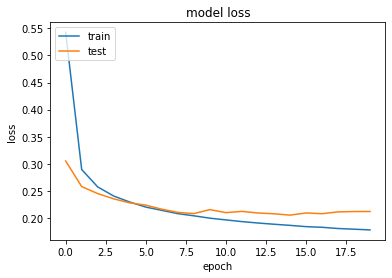

In [ ]:
# Create, compile and fit the model with the original MNIST data
from keras import layers
from keras import Sequential
from keras.layers import Dense
model = keras.Sequential() #making our model 
model.add(keras.layers.Flatten(input_shape=(28, 28))) #input layer is flattern and our input shape. flatting our 2d 28,28 image 
model.add(Dense(units=10, activation='relu')) #10 units in output layer = the number of classes. our data has 10 digits from0-9
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) #we're classfificying our images to numbers 0-9

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test)) #y_train is our catergorical data 

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

The data is overfitting because the accuracy is higher in the test than training?

##Augment the MNIST dataset with rotated, zoomed, width and height shifts

In [ ]:
# use the image data generator from keras to augment the data
from keras.preprocessing.image import ImageDataGenerator
# setup the generator that will augment the images
train_gen = ImageDataGenerator(rotation_range=8,   # rotate
                               width_shift_range=0.08,  # width shiift
                               shear_range=0.3,   # shear
                               height_shift_range=0.08, # height shift
                               zoom_range=0.08 )   # zoom  - All these values were from trial and error 


import numpy as np
# Generate aungemnted images for the training data
x_train = np.reshape(x_train, (60000,28,28,1)) #6000 training images needs to be 3d to work so add our 2d 28,28 and then add a 1 
training_set = train_gen.flow(x_train, y_train, batch_size=x_train.shape[0])

# Generate aungemnted images for the test data
x_test = np.reshape(x_test, (10000,28,28,1))
test_set= train_gen.flow(x_test, y_test, batch_size=x_test.shape[0]) #adding flow function
#batch size set to the size of our training data - 60000

# extract the augmented images from the output flow of the generator
# add the augmented images generated from the training data to the original training data
i = 0
for x, y in training_set:
  if i < 2:
    print(i)
    x_train = np.concatenate((x_train, x))
    y_train = np.concatenate((y_train, y))
    print(x_train.shape)
    print(y_train.shape)
  else:
    break
  i += 1

# add the augmented images generated from the test data to the original test data
i = 0
for x, y in test_set:
  if i < 2:
    print(i)
    x_test_aug = np.concatenate((x_test, x))
    y_test_aug = np.concatenate((y_test, y))
    print(x_test.shape)
    print(y_test.shape)
  else:
    break
  i += 1

0
(120000, 28, 28, 1)
(120000, 10)
1
(180000, 28, 28, 1)
(180000, 10)
0
(10000, 28, 28, 1)
(10000, 10)
1
(10000, 28, 28, 1)
(10000, 10)


##Create, compile and fit the model with the augmented MNIST data
(this is the same code as used above to create, compile and fit the model)

Compare this accuracy/loss with the accuracy/loss achieved with the original MNIST dataset above

In [ ]:
# same as code above to create, compile and fit the model but now using the new augmented data
from keras import layers
from keras import Sequential
from keras.layers import Dense
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

test data is higher than training data as we have added more test data into it. therefore no overfitting 

The validation accuracy may be roughly the same but it was overfitting before and now the validation accuracy is much better than the training accuracy

## Investigate the Keras `ImageDataGenerator` and see what other augmentation you could apply